In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
lenet_5_model = keras.models.load_model("my.h5")

In [26]:
import h5py
import numpy as np
m = h5py.File('my.h5', 'r')
list(m["model_weights"]['conv2d']["conv2d"]["bias:0"])

[0.08592291, 0.019856969, 0.057626158, -0.048705317, -0.06366199, -0.07696981]

In [27]:
layers = ['conv2d', 'conv2d_1', 'dense', 'dense_1', 'dense_2']

In [28]:
layers[0], type(layers[0])

('conv2d', str)

In [29]:
np.array(f["model_weights"]["conv2d"]["conv2d"]["kernel:0"]).shape

TypeError: '_io.TextIOWrapper' object is not subscriptable

In [30]:
np.array(f["model_weights"][layers[0]][layers[0]]["kernel:0"]).shape

TypeError: '_io.TextIOWrapper' object is not subscriptable

In [31]:
np.array(f["model_weights"][layers[0]][layers[0]]["kernel:0"]).shape

TypeError: '_io.TextIOWrapper' object is not subscriptable

In [32]:
with open("weights.h", "w") as f:
    for i in range(len(layers)):
        weights = np.array(m["model_weights"][layers[i]][layers[i]]["kernel:0"])
        biases = np.array(m["model_weights"][layers[i]][layers[i]]["bias:0"])
        
        if(i < 2):
            weights = np.moveaxis(weights, [3, 2], [0, 1])
        
            f.write("double " + str(layers[i]) + "_w[" + str(weights.size) + "] = {")
            for j in range(weights.size):
                w = list(weights.flat)
                if(j == 0):
                    f.write(str(w[j]))
                elif(j != weights.size - 1):
                    f.write(',' + str(w[j]))
                else:
                    f.write(',' + str(w[j]) + "};\n\n")
#                     f.write()

            f.write("double " + str(layers[i]) + "_b[" + str(biases.size) + "] = {")
            for j in range(biases.size):
                if(j == 0):
                    f.write(str(biases[j]))
                elif(j != biases.size - 1):
                    f.write("," + str(biases[j]))
                else:
                    f.write(',' + str(biases[j]) + "};\n\n")
#                     f.write("};\n\n")
        
        else:        
            f.write("double " + str(layers[i]) + "_w[" + str(weights.size) + "] = {")
            for j in range(weights.size):
                w = list(weights.flat)
                if(j == 0):
                    f.write(str(biases[j]))
                elif(j != weights.size - 1):
                    f.write(',' + str(w[j]))
                else:
                    f.write(',' + str(w[j]) + "};\n\n")
#                     f.write("};\n\n")

            f.write("double " + str(layers[i]) + "_b[" + str(biases.size) + "] = {")
            for j in range(biases.size):
                if(j == 0):
                    f.write(str(biases[j]))
                elif(j != biases.size - 1):
                    f.write("," + str(biases[j]))
                else:
                    f.write(',' + str(biases[j]) + "};\n\n")
#                     f.write("};\n\n")
            
#         if(i == 1):
#             break
        

In [11]:
np.array(f["model_weights"]["conv2d"]["conv2d"]["kernel:0"]).shape, np.array(f["model_weights"]["conv2d_1"]["conv2d_1"]["kernel:0"]).shape

TypeError: '_io.TextIOWrapper' object is not subscriptable

In [ ]:
np.array(f["model_weights"]["conv2d"]["conv2d"]["bias:0"]).shape, np.array(f["model_weights"]["conv2d_1"]["conv2d_1"]["bias:0"]).shape

In [ ]:
np.array(f["model_weights"]["dense"]["dense"]["kernel:0"]).shape, np.array(f["model_weights"]["dense_1"]["dense_1"]["kernel:0"]).shape

In [ ]:
a = np.zeros((3, 1, 4, 5))
np.moveaxis(a, [3, 2], [0, 1]).shape

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json

Using TensorFlow backend.


In [6]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

(60000, 28, 28)

In [7]:
train_y[0:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

In [8]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

TensorShape([60000, 28, 28, 1])

In [14]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [15]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [16]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2198 - accuracy: 0.9342 - val_loss: 0.0924 - val_accuracy: 0.9722
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0841 - accuracy: 0.9740 - val_loss: 0.0501 - val_accuracy: 0.9864
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0578 - accuracy: 0.9817 - val_loss: 0.0443 - val_accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0443 - accuracy: 0.9858 - val_loss: 0.0344 - val_accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0358 - accuracy: 0.9883 - val_loss: 0.0267 - val_accuracy: 0.9918


In [17]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.0532 - accuracy: 0.9833


[0.053214214742183685, 0.983299970626831]

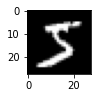

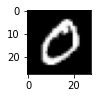

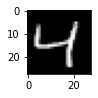

In [18]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [19]:
import os

In [20]:
lenet_5_model.save('lenet_5_model')
print(os.listdir('lenet_5_model'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: lenet_5_model/assets
['saved_model.pb', 'assets', 'variables']


In [23]:
m.close()

In [24]:
lenet_5_model.save("my.h5")

In [25]:
lenet_5_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [14]:
json_model = lenet_5_model.to_json()

In [15]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [16]:
lenet_5_model.save_weights('FashionMNIST_weights.h5')

In [26]:
a = np.array(lenet_5_model.layers[0].get_weights()[0])

In [51]:
# np.moveaxis(a, [3, 2], [0, 1])

In [46]:
len(lenet_5_model.layers[0].get_weights())

2

In [9]:
test_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same')
])

In [10]:
w1 = lenet_5_model.layers[0].get_weights()[0]
w1 = np.moveaxis(w1, [3, 2], [0, 1])
w1.shape

(6, 1, 5, 5)

In [11]:
# w1

In [12]:
test_model.layers[0].set_weights(lenet_5_model.layers[0].get_weights())

In [14]:
test_model.predict(test_x[0][np.newaxis, :]).shape

(1, 28, 28, 6)

In [15]:
pred_rm_axis = np.moveaxis(test_model.predict(test_x[0][np.newaxis, :]), 3, 1)
pred_rm_axis.shape

(1, 6, 28, 28)

In [16]:
pred_rm_axis

array([[[[ 0.08571209,  0.08571209,  0.08571209, ...,  0.08571209,
           0.08571209,  0.08571209],
         [ 0.08571209,  0.08571209,  0.08571209, ...,  0.08571209,
           0.08571209,  0.08571209],
         [ 0.08571209,  0.08571209,  0.08571209, ...,  0.08571209,
           0.08571209,  0.08571209],
         ...,
         [ 0.08571209,  0.08571209,  0.08571209, ...,  0.08571209,
           0.08571209,  0.08571209],
         [ 0.08571209,  0.08571209,  0.08571209, ...,  0.08571209,
           0.08571209,  0.08571209],
         [ 0.08571209,  0.08571209,  0.08571209, ...,  0.08571209,
           0.08571209,  0.08571209]],

        [[ 0.01985436,  0.01985436,  0.01985436, ...,  0.01985436,
           0.01985436,  0.01985436],
         [ 0.01985436,  0.01985436,  0.01985436, ...,  0.01985436,
           0.01985436,  0.01985436],
         [ 0.01985436,  0.01985436,  0.01985436, ...,  0.01985436,
           0.01985436,  0.01985436],
         ...,
         [ 0.01985436,  0.01985436